In [29]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

allData = pd.read_csv("../AllVexData_2022_12_9.csv")

In [30]:
# a = allData[allData["Event Region"] == "Illinois"]
a = allData

# Filter out where the data does not have a driver score for the skills
a = a[pd.notna(a["Highest Driver Score Timestamp"])]

In [31]:
dates = [z.split(" ")[0] for z in a["Highest Driver Score Timestamp"][pd.notna(a["Highest Driver Score Timestamp"])]]
dates = [[int(y) for y in z.split("-")] for z in dates]
timedates = []
for date in dates:

  timedates.append((datetime.datetime(date[0], date[1], date[2], 0, 0).timestamp() // (3600 * 24 * 7)) * (3600 * 24 * 7))

a["Datetime"] = timedates

/tmp/ipykernel_7735/195031029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Datetime"] = timedates


In [19]:
print(a.columns)

Index(['Rank', 'Score', 'Programming Skills', 'Driver Skills',
       'Highest Programming Skills', 'Highest Driver Skills',
       'Highest Programming Score Timestamp', 'Highest Driver Score Timestamp',
       'Highest Programming Score Stop Time', 'Highest Driver Score Stop Time',
       'Team Number', 'Team Name', 'Organization', 'Event Region',
       'Country/Region', 'Datetime'],
      dtype='object')


time_periods_driver = [1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1658966400.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1660176000.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1661990400.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1662595200.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663200000.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1663804800.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.0, 1664409600.

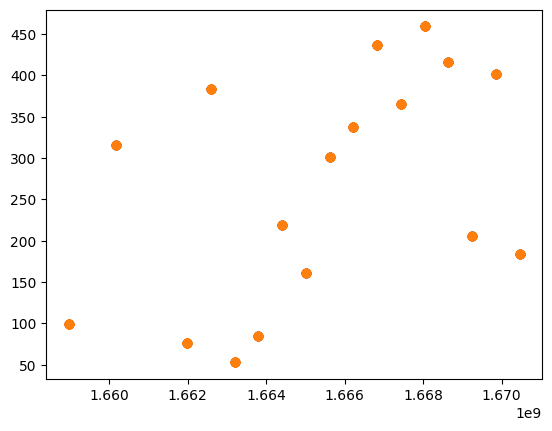

In [33]:

def get_highest(_type):
  unique_time_periods = []
  highest_scores = []
  for _datetime in np.unique(a["Datetime"]):
    # print(_datetime)
    b = a[a["Datetime"] == _datetime]
    # print("Max:", max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
    for i in range(10):
      try:
        # highest_scores.append(max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
        highest_scores.append(max(b[f"Score"][pd.notna(b[f"Score"])]))
        # b = b[b[f"Highest {_type} Skills"] != max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])])]
        unique_time_periods.append(_datetime)
      except Exception as e:
        pass
      

  plt.plot(unique_time_periods, highest_scores, "o")
  print(f"time_periods_{_type.lower()} =",unique_time_periods)
  print(f"scores_{_type.lower()} = ", highest_scores)

get_highest("Driver")
get_highest("Programming")
  

Index(['Rank', 'Score', 'Programming Skills', 'Driver Skills',
       'Highest Programming Skills', 'Highest Driver Skills',
       'Highest Programming Score Timestamp', 'Highest Driver Score Timestamp',
       'Highest Programming Score Stop Time', 'Highest Driver Score Stop Time',
       'Team Number', 'Team Name', 'Organization', 'Event Region',
       'Country/Region', 'Datetime'],
      dtype='object')


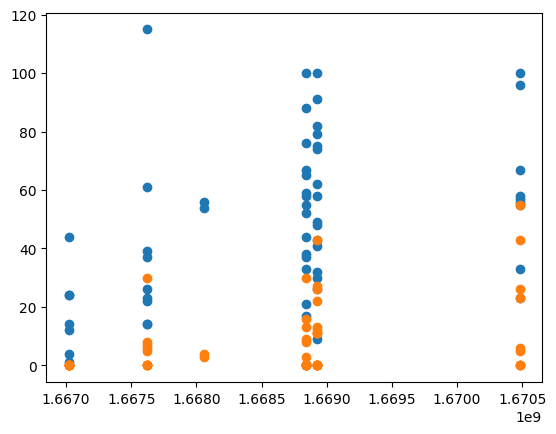

In [12]:
print(a.columns)
# plt.plot(a["Datetime"], a["Highest Driver Skills"], "o")
plt.plot(a["Datetime"], a["Highest Driver Skills"], "o")
plt.plot(a["Datetime"], a["Highest Programming Skills"], "o")
# print(2.9405587061541693e-05 * (1673676000.0 - min(a["Datetime"])))
# plt.plot([1673676000.0, 1673676000.0], [0, 2.9405587061541693e-05 * (1673676000.0 - min(a["Datetime"]))])

In [48]:
ys = (max(a[a["Datetime"] == max(a["Datetime"])]["Highest Driver Skills"]), max(a[a["Datetime"] == min(a["Datetime"])]["Highest Driver Skills"]))
xs = max(a["Datetime"]), min(a["Datetime"])

In [49]:
(ys[0] - ys[1]) / (xs[0] - xs[1])

2.9405587061541693e-05